# Riffusion tweaks Stable Diffusion to make AI text to image spectrograms play audio

1. Specify a text prompt
2. The prompt will generate a spectogram image (frequency, Db, time)
3. The AI service will transform this spectogram image into an audio file

In [1]:
#!pip install -q -U diffusers transformers ftfy pydub

In [3]:
if not os.path.exists("audio.py"):
    !wget -q https:// raw.githubusercontent.com/hmartiro/riffusion-inference/main/riffusion/audio.py

else:
    !ls audio.py -lh

-rwxrwxrwx 1 root root 4.7K Dec 16 08:41 audio.py


In [4]:
import torch
import IPython
import time
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

from diffusers import StableDiffusionPipeline
from audio import wav_bytes_from_spectrogram_image

## Riffusion model

In [5]:
pipe = StableDiffusionPipeline.from_pretrained(
    "riffusion/riffusion-model-v1", torch_dtype=torch.float16).to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

## Function

In [6]:
def riffusion_text_to_image_to_audio(prompt, audiofile):
    """
    Generate audio file from a prompt using Riffusion
    """
    t1 = time.time()

    print("1. Generating spectogram image from prompt:", prompt)
    with torch.autocast("cuda"):
        spectogram_image = "spectogram_" + prompt
        spectogram_image = pipe(prompt, height=512, width=512).images[0]
    print("OK\n")

    print("2. Generating the audio file", audiofile,
          "from the spectogram image")
    wav = wav_bytes_from_spectrogram_image(spectogram_image)

    with open(audiofile, "wb") as f:
        f.write(wav[0].getbuffer())
    print("OK")

    print("\nDone in", round(time.time() - t1), "seconds")

    return spectogram_image, audiofile

## Exemple 1

In [7]:
prompt = "bongos on a havana street"  #@param {type: 'string'}
audiofile = "audio1.wav"

In [8]:
spectogram_image, audiofile = riffusion_text_to_image_to_audio(
    prompt, audiofile)

1. Generating spectogram image from prompt: bongos on a havana street


  0%|          | 0/50 [00:00<?, ?it/s]

OK

2. Generating the audio file audio1.wav from the spectogram image
OK

Done in 103 seconds


Spectogram image of bongos on a havana street


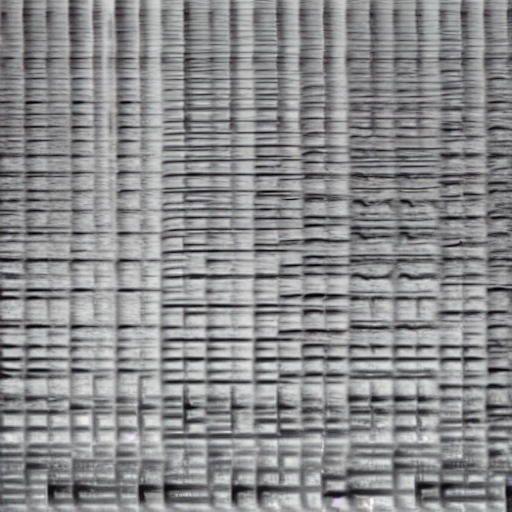

In [9]:
print("Spectogram image of", prompt)
spectogram_image

In [10]:
IPython.display.Audio(audiofile, rate=44100)

## Example 2

In [11]:
prompt = "funk bassline with a jazzy saxophone solo"
audiofile = "audio2.wav"

In [12]:
spectogram_image, audiofile = riffusion_text_to_image_to_audio(
    prompt, audiofile)

1. Generating spectogram image from prompt: funk bassline with a jazzy saxophone solo


  0%|          | 0/50 [00:00<?, ?it/s]

OK

2. Generating the audio file audio2.wav from the spectogram image
OK

Done in 100 seconds


Spectogram image of funk bassline with a jazzy saxophone solo


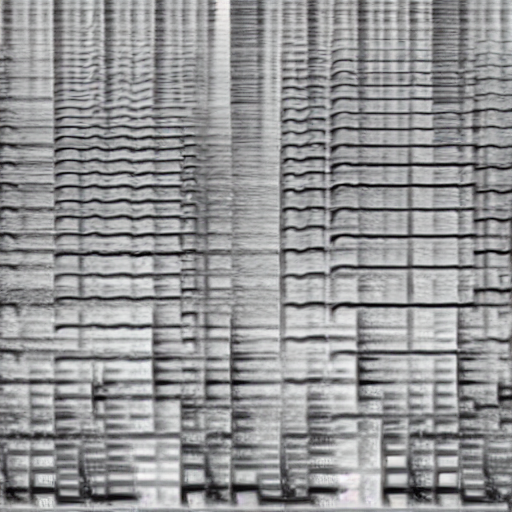

In [13]:
print("Spectogram image of", prompt)
spectogram_image

In [14]:
IPython.display.Audio(audiofile, rate=44100)

## Example 3

In [15]:
prompt = "some piano chords and a violin solo"
audiofile = "audio3.wav"

In [16]:
spectogram_image, audiofile = riffusion_text_to_image_to_audio(
    prompt, audiofile)

1. Generating spectogram image from prompt: some piano chords and a violin solo


  0%|          | 0/50 [00:00<?, ?it/s]

OK

2. Generating the audio file audio3.wav from the spectogram image
OK

Done in 100 seconds


Spectogram image of some piano chords and a violin solo


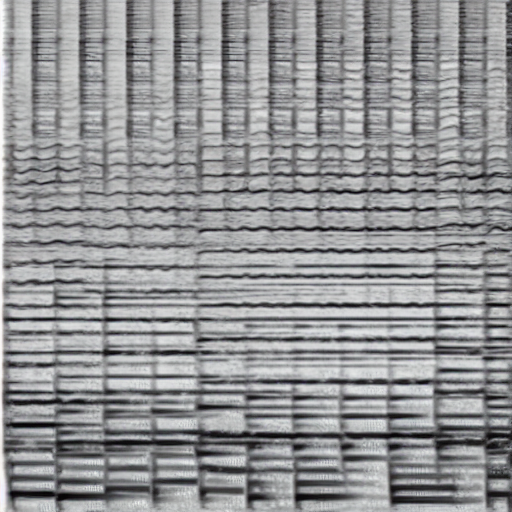

In [17]:
print("Spectogram image of", prompt)
spectogram_image

In [18]:
IPython.display.Audio(audiofile, rate=44100)

## Exemple 4

In [19]:
prompt = "a heavy metal electric guitar solo"
audiofile = "audio4.wav"

In [20]:
spectogram_image, audiofile = riffusion_text_to_image_to_audio(
    prompt, audiofile)

1. Generating spectogram image from prompt: a heavy metal electric guitar solo


  0%|          | 0/50 [00:00<?, ?it/s]

OK

2. Generating the audio file audio4.wav from the spectogram image
OK

Done in 100 seconds


Spectogram image of a heavy metal electric guitar solo


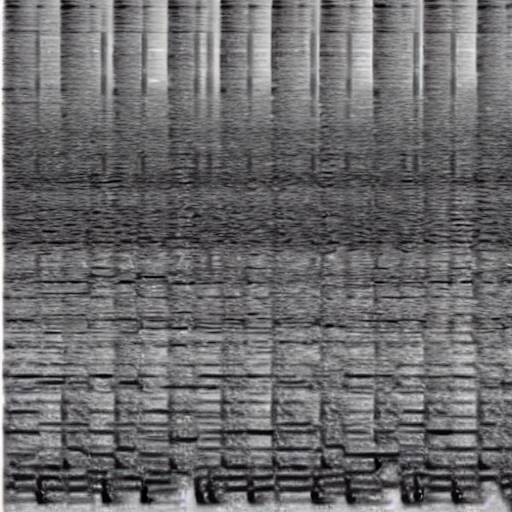

In [21]:
print("Spectogram image of", prompt)
spectogram_image

In [22]:
IPython.display.Audio(audiofile, rate=44100)

## Generated audio spectograms

In [34]:
def spectogram(audiofile):
    """
    Get spectogram from an audio file
    """
    audio_data, sr = librosa.load(audiofile, sr=8000, mono=True)
    melspectrum = librosa.feature.melspectrogram(y=audio_data,
                                             sr=sr,
                                             hop_length=512,
                                             window='hann',
                                             n_mels=256)

    fig, ax = plt.subplots()
    S_dB = librosa.power_to_db(melspectrum, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, ax=ax)

    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    spec_title = 'Mel-frequency spectrogram of ' + audiofile
    ax.set(title=spec_title)

    plt.show()

In [35]:
!ls *.wav -lh

-rwxrwxrwx 1 root root 1.8M Dec 16 10:05 all_audiofiles.wav
-rwxrwxrwx 1 root root 441K Dec 16 09:58 audio1.wav
-rwxrwxrwx 1 root root 441K Dec 16 10:00 audio2.wav
-rwxrwxrwx 1 root root 441K Dec 16 10:01 audio3.wav
-rwxrwxrwx 1 root root 441K Dec 16 10:03 audio4.wav


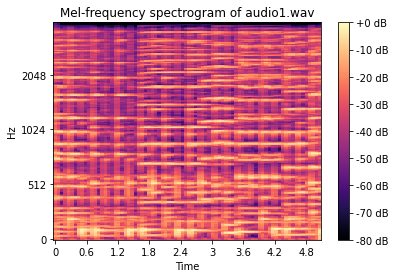

In [36]:
spectogram("audio1.wav")

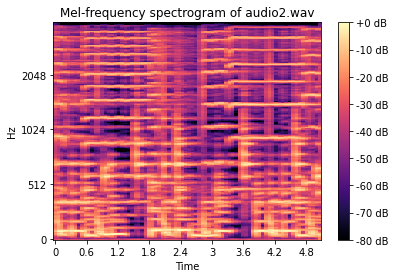

In [37]:
spectogram("audio2.wav")

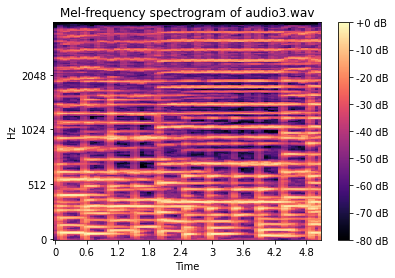

In [38]:
spectogram("audio3.wav")

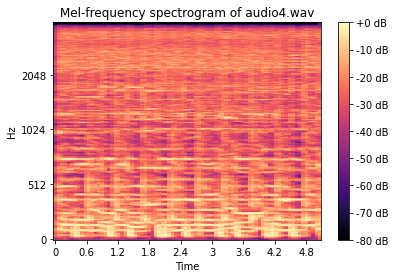

In [39]:
spectogram("audio4.wav")

## Merging all audio files

In [32]:
from pydub import AudioSegment
from pydub.playback import play

audio1  = AudioSegment.from_wav("audio1.wav")
audio2  = AudioSegment.from_wav("audio2.wav")
audio3  = AudioSegment.from_wav("audio3.wav")
audio4  = AudioSegment.from_wav("audio4.wav")
all_audiofiles = audio1 + audio2 + audio3 + audio4

all_audiofiles.export(out_f="all_audiofiles.wav",
                      format="wav")

<_io.BufferedRandom name='all_audiofiles.wav'>

In [33]:
IPython.display.Audio("all_audiofiles.wav", rate=44100)